In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


Using TensorFlow backend.


In [2]:
#conv layers
model = Sequential()
#model.add(Conv2D(64, (3, 3), input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))






W0906 06:31:13.392713 139986262103936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 06:31:13.415651 139986262103936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 06:31:13.418668 139986262103936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0906 06:31:13.436941 139986262103936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
#fully connected layers
model.add(Flatten())  
 
model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'sigmoid', units=1)) 

In [4]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0906 06:31:13.573990 139986262103936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0906 06:31:13.604431 139986262103936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3657: The name tf.log is deprecated. Please use tf.math.log instead.

W0906 06:31:13.612124 139986262103936 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
       )

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_set = train_datagen.flow_from_directory(
        '/content/drive/My Drive/AI/helmet_detection/training',
        target_size=(64, 64),
        class_mode='binary')

Found 647 images belonging to 2 classes.


In [8]:
test_set = test_datagen.flow_from_directory(
        '/content/drive/My Drive/AI/helmet_detection/testing',
        target_size=(64, 64),
        class_mode='binary')

Found 208 images belonging to 2 classes.


In [9]:
model.fit_generator(
        train_set,
        epochs=9,
        validation_data=test_set)

W0906 06:31:35.233009 139986262103936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/9
21/21 [==============================] - 9s 428ms/step - loss: 0.6739 - acc: 0.5486 - val_loss: 0.6530 - val_acc: 0.4808
Epoch 2/9
21/21 [==============================] - 8s 375ms/step - loss: 0.5754 - acc: 0.6828 - val_loss: 0.4817 - val_acc: 0.8317
Epoch 3/9
21/21 [==============================] - 8s 380ms/step - loss: 0.5023 - acc: 0.7868 - val_loss: 0.3375 - val_acc: 0.8365
Epoch 4/9
21/21 [==============================] - 8s 377ms/step - loss: 0.5685 - acc: 0.7320 - val_loss: 0.5401 - val_acc: 0.6779
Epoch 5/9
21/21 [==============================] - 8s 382ms/step - loss: 0.4605 - acc: 0.7964 - val_loss: 0.2869 - val_acc: 0.8606
Epoch 6/9
21/21 [==============================] - 8s 382ms/step - loss: 0.4230 - acc: 0.7982 - val_loss: 0.3928 - val_acc: 0.8221
Epoch 7/9
21/21 [==============================] - 8s 379ms/step - loss: 0.4289 - acc: 0.8235 - val_loss: 0.3970 - val_acc: 0.7981
Epoch 8/9
21/21 [==============================] - 8s 377ms/step - loss: 0.3518 - a

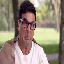

In [35]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('/content/drive/My Drive/AI/helmet_detection/single_prediction/abm.jpg'
                           ,target_size =(64,64))

test_image

In [0]:
## Convert image to array
test_image = image.img_to_array(test_image)

test_image=test_image.reshape(1,64, 64, 3)

In [0]:
## For single prediction change the dimension using axis. To remove problem of batch
#test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)

In [38]:
np.around(result)

array([[0.]], dtype=float32)

In [39]:
result=result.argmax()

result

0

In [40]:
label_map = (train_set.class_indices)
print(label_map)

{'with helmet': 0, 'without helmet': 1}


In [0]:
## Class label 

if result == 1:
    prediction = 'without helmet'
else:
    prediction = 'with helmet'

In [42]:

prediction

'with helmet'

In [43]:

x = model.predict(test_image)

x

array([[0.]], dtype=float32)